In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('C:/Users/ASUS/Documents/Kuliah Satria/Materi Semester 6/PKL/Analisis Data/breastcancer')
df.head(100)

,Age,Tumor Size (cm),Metastasis,Diagnosis Result
0,40,2,0,0
1,39,2,0,0
2,45,4,0,0
3,26,3,0,0
4,21,1,0,0
...,...,...,...,...
95,21,3,0,0
96,65,6,1,1
97,19,1,0,0
98,46,7,0,1


In [3]:
df['Metastasis'] = df['Metastasis'].astype('category')
df['Diagnosis Result'] = df['Diagnosis Result'].astype('category')
print(df.dtypes)

Age                    int64
Tumor Size (cm)        int64
Metastasis          category
Diagnosis Result    category
dtype: object


In [4]:
X = df.drop('Diagnosis Result', axis=1)
Y = df['Diagnosis Result']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
print(X_test.shape[0])

43


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

model.add(tf.keras.layers.Dense(42, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 42)                168       
                                                                 
 dense_16 (Dense)            (None, 6)                 258       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [45]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.07688114,  0.11573625, -0.25569755, -0.2820263 ,  0.0116367 ,
         0.30851877, -0.02964714,  0.01664248,  0.09629703,  0.00532925,
        -0.2238677 ,  0.17068481, -0.1732068 , -0.3461104 , -0.12897483,
        -0.34504184,  0.2934459 ,  0.02965349,  0.05929932,  0.04329854,
         0.2832176 , -0.35772535,  0.0625633 , -0.29824087,  0.21515882,
        -0.04316953, -0.2114727 ,  0.07839099,  0.04419872, -0.04279447,
        -0.11737981,  0.2839164 ,  0.24810344,  0.00736469,  0.18188357,
         0.21800888, -0.26654002, -0.1571068 ,  0.29562294,  0.12612003,
         0.06122583,  0.08917418],
       [ 0.09505594, -0.28201646,  0.2785355 , -0.0461424 , -0.35309595,
         0.16987616,  0.23171657,  0.16252458,  0.12178591, -0.2526008 ,
         0.00159386,  0.1339623 ,  0.00397864, -0.15192467, -0.07931015,
        -0.11925104,  0.33270425,  0.32036704,  0.29728872,  0.17226833,
         0.21336812, -0.23098452, -0.06540722, -0.18679398, -0.3217886 ,
         0.0515

In [46]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.5680
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.5680
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.5680
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.6154
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.7456
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.7870
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 0.1964 - accuracy: 0.8343
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.8462
Epoch 9/150
6/6 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.8521
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.8639
Epoch 11/150
6/6 [===========

Text(0.5, 0, 'epoch')

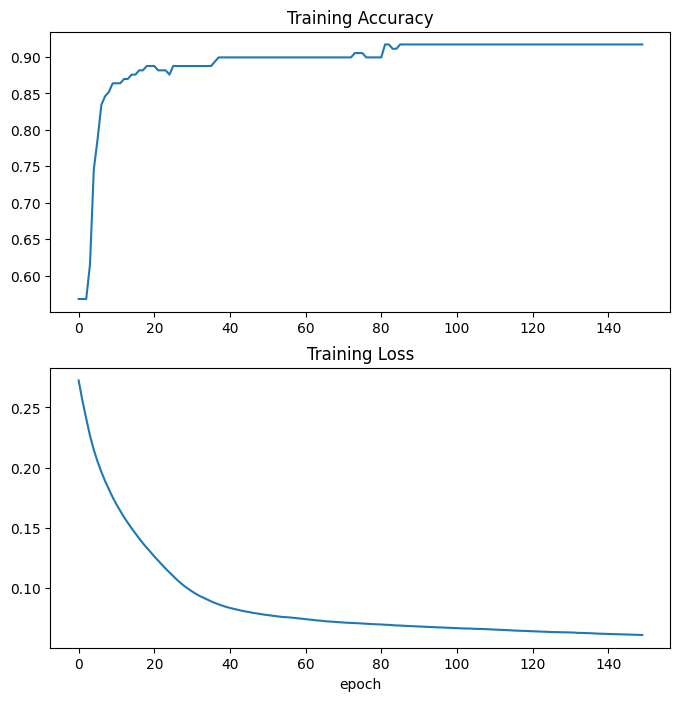

In [48]:
acc = history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('epoch')

In [49]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.04009266, -0.08578952, -0.21890526, -0.25958115,  0.26334357,
         0.5002934 ,  0.10236104,  0.02334357,  0.13774894, -0.14817902,
        -0.39929447,  0.10103481, -0.40845287, -0.44355437, -0.13783492,
        -0.28780642,  0.34849593, -0.04338482, -0.00901123,  0.09308218,
         0.20826043, -0.654086  , -0.10930754, -0.28927198,  0.15362483,
         0.0382306 , -0.39487138,  0.18165195, -0.10465348,  0.00400907,
        -0.01464662,  0.37786183,  0.3439361 ,  0.10591191,  0.21573305,
         0.33276257, -0.4308103 , -0.23173515,  0.27829993,  0.39600492,
         0.14936435,  0.17571425],
       [ 0.29064524, -0.20858288,  0.6136564 ,  0.29900873, -0.47799698,
         0.17959815,  0.38988358,  0.11016314,  0.4780781 , -0.24704692,
        -0.24561033,  0.5253637 , -0.1679947 , -0.32806897, -0.14865498,
        -0.03277586,  0.5022214 ,  0.60504264,  0.60791856,  0.0847524 ,
         0.24548751, -0.42414516, -0.1108233 , -0.16251679, -0.33093593,
         0.3488

In [50]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9302
Test Loss: 0.06268253922462463
Test Accuracy: 0.930232584476471


In [51]:
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred)
cm

2/2 [==============================] - 0s 2ms/step


array([[24,  0],
       [ 3, 16]], dtype=int64)